In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm

In [5]:
traj = abs(np.load("../traj/beta0.5_nu1e-05_400period.npy"))

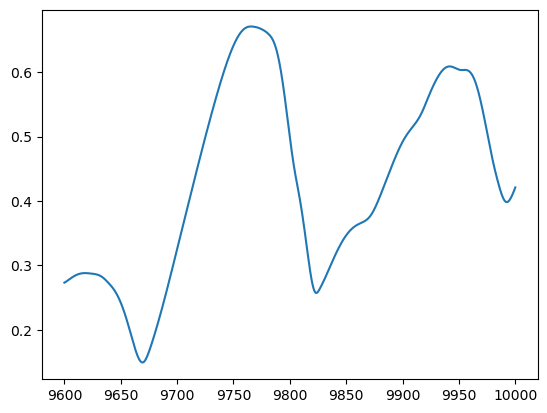

In [9]:
plt.plot(traj[-1,:], traj[0, :])

## 分岐図の描画

0it [00:00, ?it/s]

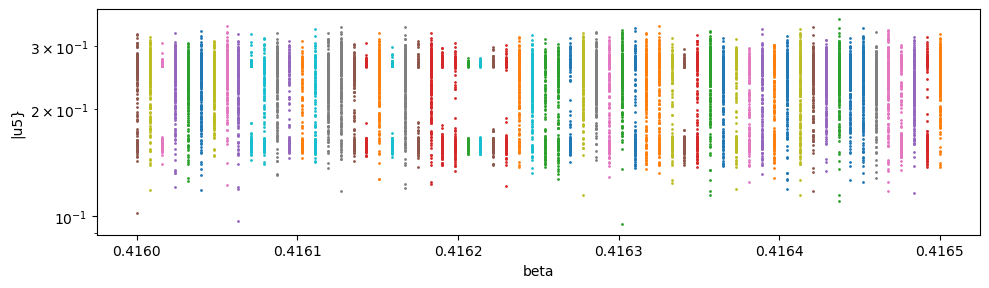

In [8]:
filename = "../bif_data/bif_0.416to0.4165_nu0.00018to0.00018_100steps_period20000_latter_0.1.txt"

#プロットの設定
fig = plt.figure(figsize=(10,15))

spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 1, 1])

# ax1 = fig.add_subplot(spec[0],projection='3d')
# ax1.set_xlabel("beta")
# ax1.set_ylabel("nu(log10)")
# ax1.set_zlabel("|u5|(log10)")

ax2 = fig.add_subplot(spec[1])
ax2.set_xlabel("beta")
ax2.set_ylabel("|u5}")
ax2.set_yscale("log")
ax2.xaxis_inverted()

# ax3 = fig.add_subplot(spec[2])
# ax3.set_xlabel("nu")
# ax3.set_ylabel("|u5|")
# ax3.set_xscale("log")
# ax3.set_yscale("log")

with open(filename, "r") as file:
    for line in tqdm(file):
        parts = line.split()  # 行をスペースで分割
        beta = float(parts[0])  # 1つ目の数値をfloatに変換
        nu = float(parts[1])  # 2つ目の数値をfloatに変換
        values = [float(x) for x in parts[2:]]  # 3つ目以降の数値をfloatに変換してリストに格納
    
    #     #3dプロット
    #     z_list_log = np.log10(z_list)
    #     ax1.scatter([beta_param[i]]*len(z_list),[log_range[i]]*len(z_list),z_list_log, s=1)

        #2dプロット
        ax2.scatter([beta]*len(values),values,s=1)

        # ax3.scatter([nu]*len(values),values,s=1)

fig.tight_layout()
#fig.savefig(fname=f"../bif_image_for_each_beta_and_nu/nu({nu_param[0]},{nu_param[-1]})_beta({beta_param[0]},{beta_param[-1]})_{runge_para['step']}_{runge_para['period']}_{param_step}cut_{Dimention}dim_latter{round(kaishi/step_number,2)}.png")
